In [1]:
from waggon.utils import display
from waggon.surrogates import GP
from waggon.acquisitions import EI
from waggon import functions as f
from waggon.optim import SurrogateOptimiser

In [5]:
SEEDS = [2, 3, 5]

Experiment #0


Optimisation error: 0.0010:  13%|█▎        | 13/100 [00:11<01:15,  1.16it/s]


Experiment finished successfully


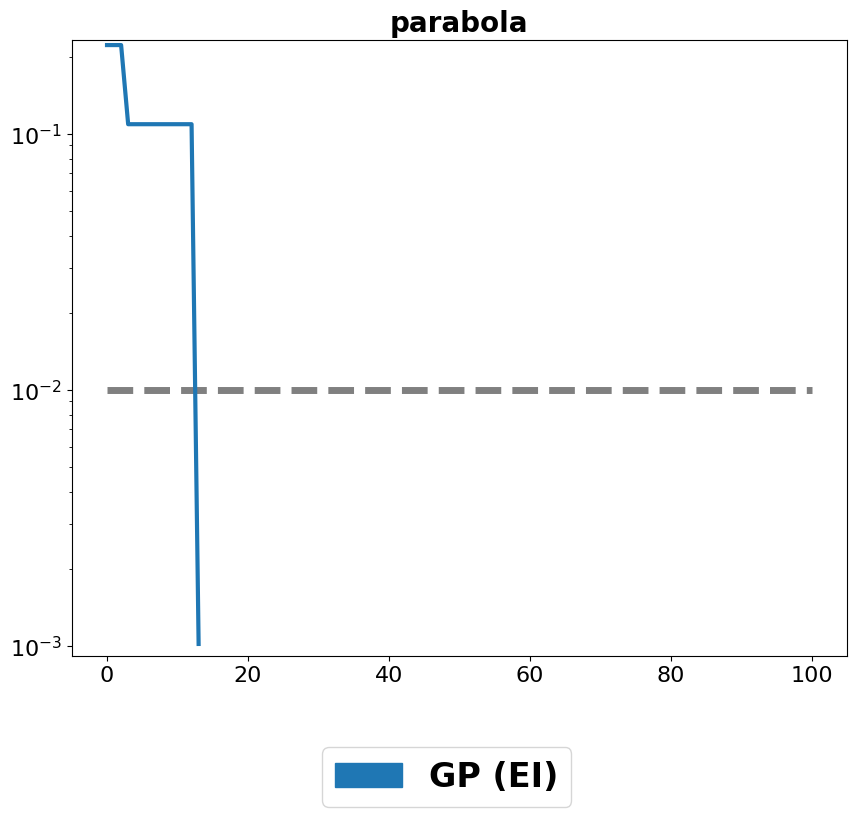

Experiment #1


Optimisation error: 0.0012:   8%|▊         | 8/100 [00:09<01:49,  1.19s/it]


Experiment finished successfully


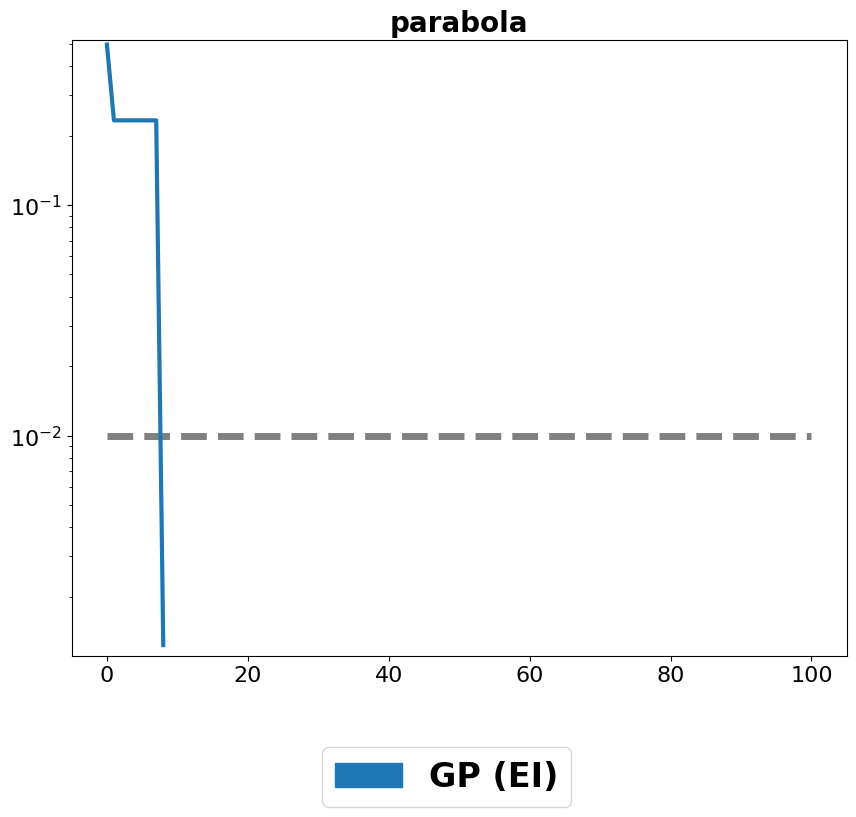

Experiment #2


Optimisation error: 0.0968: 100%|██████████| 100/100 [03:26<00:00,  2.06s/it]


Experiment failed


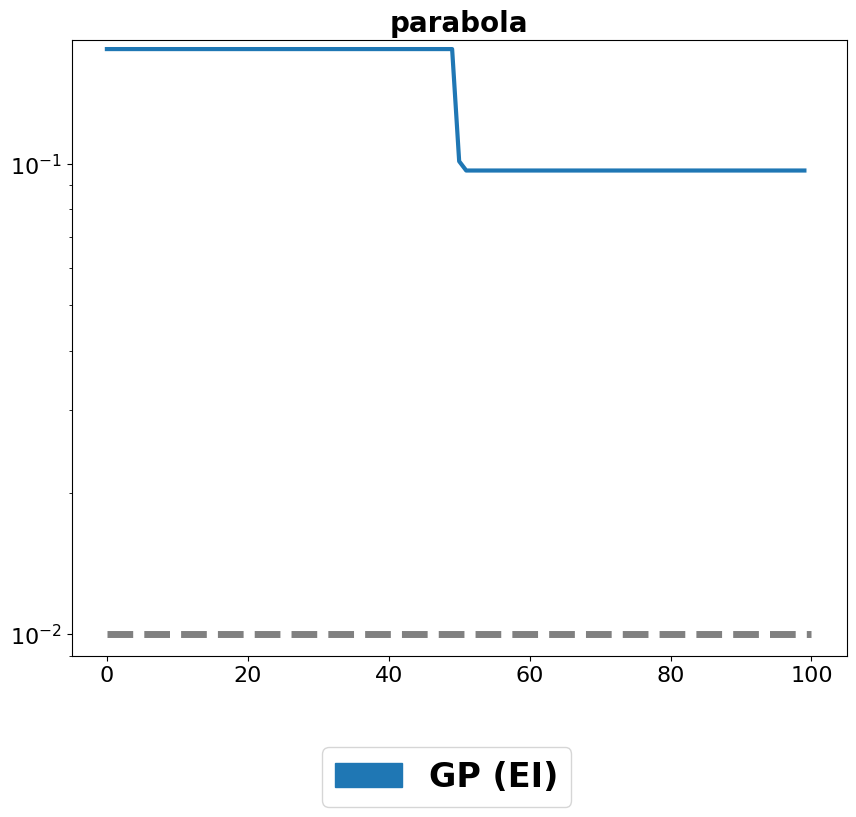

In [6]:
for i, seed in enumerate(SEEDS):
        
    print(f'Experiment #{i}')

    opt = SurrogateOptimiser(func=f.Function(n_obs=10), # f(x)=x^2 by default
                            surr=GP(),
                            acqf=EI(),
                            eps=1e-2,
                            seed=seed,
                            save_res=True)
    opt.optimise()
    display(opt)

{'GP': {'res': (array([6.56538002, 0.10878719, 0.04473354, 0.04473354, 0.03227045,
          0.03227045, 0.03227045, 0.03227045, 0.03227045, 0.01420667,
          0.3475395 , 0.3475395 , 0.3475395 , 0.3475395 , 0.34358485,
          0.67691784, 0.67691784, 0.67691784, 0.67691784, 0.67691784,
          0.67691784, 0.67691784, 0.67691784, 0.67691784, 0.67691784,
          0.67691784, 0.67691784, 0.67691784, 0.67691784, 0.67691784,
          0.67691784, 0.67691784, 0.67691784, 0.67691784, 0.67691784,
          0.67691784, 0.67691784, 0.67691784, 0.67691784, 0.67691784,
          0.67691784, 0.67691784, 0.67691784, 0.67691784, 0.67691784,
          0.67691784, 0.67691784, 0.67691784, 0.67691784, 0.67691784,
          0.67691784, 0.67008371, 0.66978827, 0.66978827, 0.66978827,
          0.66978827, 0.66978827, 0.66978827, 0.66978827, 0.66978827,
          0.66978827, 0.66978827, 0.66978827, 0.66978827, 0.66978827,
          0.66978827, 0.66978827, 0.66978827, 0.66978827, 0.66978827,
       

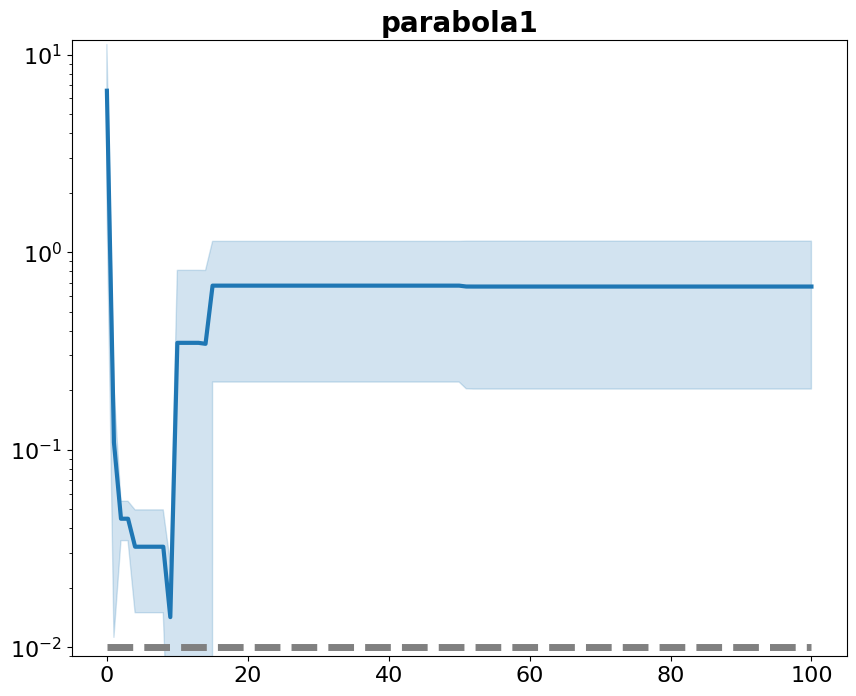

In [3]:
display('parabola1', eps=1e-2)